In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
from sklearn.metrics import r2_score

In [2]:
data_dir = Path('../6_pyvista-volume')
data_files = list(data_dir.glob('smoothed_*.volume.txt'))

In [3]:
def get_iters_from_fname(p: Path) -> int:
    return int(str(p).split('_')[-4])

def read_float(p: Path) -> float:
    return float(p.read_text())

In [4]:
df = pd.DataFrame({
    'taubin': map(get_iters_from_fname, data_files),
    'volume': map(read_float, data_files)
})
df.sort_values(by='taubin', inplace=True)

In [5]:
sns.set(rc={'figure.figsize':(10,5)})

<AxesSubplot:xlabel='taubin', ylabel='volume'>

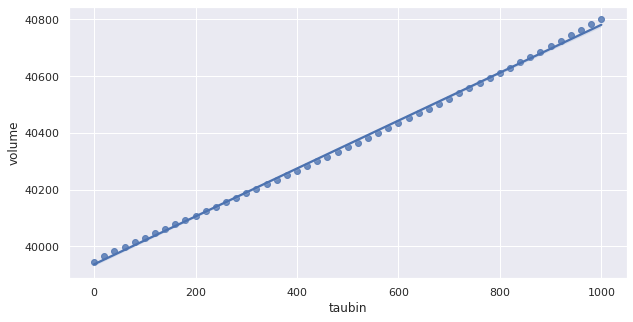

In [6]:
sns.regplot(df, x='taubin', y='volume')

In [7]:
df.volume.min(), df.volume.max()

(39946.716613714474, 40800.61793011143)

In [8]:
def linear_regression(df):
    x = np.array(df['taubin'], dtype=np.float32)
    y = np.array(df['volume'], dtype=np.float32)
    A = np.vstack([x, np.ones(len(x))]).T

    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    pred = x * m + c
    r2 = r2_score(y, pred)
    print(f'y = {m:.4E}*x + {c:.4f}, r^2={r2:.4f}')

In [9]:
linear_regression(df)

y = 8.4283E-01*x + 39937.0350, r^2=0.9988


In [10]:
df[df.taubin == 200]

,taubin,volume
24,200,40108.085989


In [11]:
df[df.taubin == 0]

,taubin,volume
33,0,39946.716614


In [12]:
39946.716614 /40108.085989


0.9959766373532694